In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [2]:
train_df = pd.read_csv("Final_Train_Data.csv")

In [3]:
test_df = pd.read_csv("Final_Test_Data.csv")

In [4]:
X = train_df.drop("Survived",axis=1)

In [5]:
y = train_df["Survived"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
X_final_test = test_df

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [25]:
final_model = RandomForestClassifier()

In [26]:
n_estimators = [10,50,100,200,300]

grid_param = {'n_estimators':n_estimators}

In [27]:
grid_model = GridSearchCV(estimator=final_model,param_grid=grid_param)

In [28]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 300]})

In [29]:
grid_model.best_params_

{'n_estimators': 300}

In [30]:
final_model = RandomForestClassifier(n_estimators=300)
final_model.fit(X_train,y_train)
y_prediction = final_model.predict(X_test)

In [31]:
y_prediction = pd.DataFrame(data=y_prediction,columns=['Survived'])

In [32]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85        51
         1.0       0.92      0.62      0.74        39

    accuracy                           0.81        90
   macro avg       0.84      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



In [35]:
confusion_matrix(y_test,y_prediction)

array([[49,  2],
       [15, 24]], dtype=int64)

In [33]:
y_prediction

,Survived
0,0.0
1,1.0
2,0.0
3,1.0
4,0.0
...,...
85,0.0
86,0.0
87,1.0
88,0.0


In [ ]:
# AdBooster Prediction Model ==> score 0.77

In [8]:
from sklearn.ensemble import AdaBoostClassifier

In [9]:
X_train.shape

(801, 10)

In [11]:
error = []

for i in range(1,10):
    model = AdaBoostClassifier(n_estimators=i)
    model.fit(X_train,y_train)
    y_prediction = model.predict(X_test)
    
    err = 1 - accuracy_score(y_test,y_prediction)
    error.append(err)

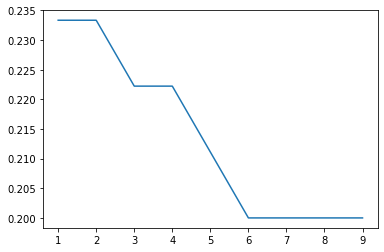

In [13]:
plt.plot(range(1,10),error)

In [14]:
final_model = AdaBoostClassifier(n_estimators=6)

In [15]:
final_model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=6)

In [19]:
y_pred = final_model.predict(X_test)

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.88      0.83        51
         1.0       0.82      0.69      0.75        39

    accuracy                           0.80        90
   macro avg       0.80      0.79      0.79        90
weighted avg       0.80      0.80      0.80        90



In [30]:
# SVC model prediction

In [45]:
from sklearn.svm import SVC

In [46]:
model_svc = SVC()

In [47]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'probability':[True,False]
             }

In [48]:
grid_model = GridSearchCV(estimator=model_svc,param_grid=param_grid)

In [49]:
# grid_model.fit(X_train,y_train)

In [50]:
model_svc.fit(X_train,y_train)

SVC()

In [51]:
y_pred = model_svc.predict(X_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.58      0.98      0.73        51
         1.0       0.75      0.08      0.14        39

    accuracy                           0.59        90
   macro avg       0.67      0.53      0.43        90
weighted avg       0.65      0.59      0.47        90



In [53]:
# Gradient Boosting Model Predictions

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

In [55]:
gb_model = GradientBoostingClassifier()

In [56]:
grid_param = {
    'n_estimators':[50,100,150,200],
    'max_depth':[3,4,5,6],
    'learning_rate':[0.1,0.05,0.2],
}

In [57]:
grid_model = GridSearchCV(estimator=gb_model,param_grid=grid_param)

In [58]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5, 6],
                         'n_estimators': [50, 100, 150, 200]})

In [ ]:
grid_model.best_params_

ERROR:asyncio:Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vishal\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vishal\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
ERROR:asyncio:Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vishal\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vishal\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing 

{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100}

ERROR:asyncio:Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vishal\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vishal\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
ERROR:asyncio:Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\vishal\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\vishal\anaconda3\lib\asyncio\selector_events.py", line 120, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing 

In [60]:
y_predict = grid_model.predict(X_test)

In [61]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.78      0.92      0.85        51
         1.0       0.87      0.67      0.75        39

    accuracy                           0.81        90
   macro avg       0.82      0.79      0.80        90
weighted avg       0.82      0.81      0.81        90



In [80]:
final_model = GradientBoostingClassifier(learning_rate=0.05,max_depth=5,n_estimators=100)

In [81]:
final_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5)

In [82]:
y_pred = final_model.predict(X_test)

In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.94      0.86        51
         1.0       0.90      0.67      0.76        39

    accuracy                           0.82        90
   macro avg       0.84      0.80      0.81        90
weighted avg       0.83      0.82      0.82        90



In [84]:
accuracy_score(y_test,y_pred)

0.8222222222222222

In [66]:
final_y_prediction = final_model.predict(X_final_test).astype(int)

In [67]:
final_y_prediction = pd.DataFrame(data=final_y_prediction,columns=['Survived'])

In [68]:
final_y_prediction

,Survived
0,0
1,1
2,0
3,0
4,0
...,...
413,0
414,1
415,0
416,0


In [69]:
sample_submition = pd.read_csv("gender_submission.csv")

In [70]:
final_submition = pd.concat([sample_submition['PassengerId'],final_y_prediction],axis=1,)

In [71]:
final_submition

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [72]:
final_submition.to_csv('Final_Submition.csv',index=False)

In [73]:
F_df = pd.read_csv("Final_Submition.csv")

In [74]:
F_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [75]:
sample_submition

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
